<a href="https://colab.research.google.com/github/julianl11/projektarbeit_1/blob/main/03_computer_vision_torch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Start GO!

In [1]:
"hello"

'hello'

In [2]:
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check versions
# Note: your PyTorch version shouldn't be lower than 1.10.0 and torchvision version shouldn't be lower than 0.11
print(f"PyTorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")

PyTorch version: 2.6.0+cu124
torchvision version: 0.21.0+cu124


In [3]:
train_data = datasets.FashionMNIST(
    root="data", # where to download data to?
    train=True, # get training data
    download=True, # download data if it doesn't exist on disk
    transform=ToTensor(), # images come as PIL format, we want to turn into Torch tensors
    target_transform=None # you can transform labels as well
)

# Setup testing data
test_data = datasets.FashionMNIST(
    root="data",
    train=False, # get test data
    download=True,
    transform=ToTensor()
)

100%|██████████| 26.4M/26.4M [00:02<00:00, 12.7MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 203kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.72MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 8.75MB/s]


In [4]:
len(train_data[0])

2

In [5]:
img, label = train_data[0]
print(img.shape, label)

torch.Size([1, 28, 28]) 9


In [6]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

Image shape: torch.Size([1, 28, 28])


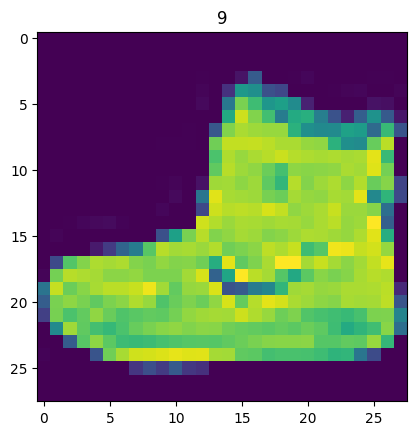

In [7]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze()) # image shape is [1, 28, 28] (colour channels, height, width)
plt.title(label);

In [8]:
train_dataloader = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_data, batch_size=32, shuffle=False)

In [9]:
(next(iter(train_dataloader))[0]).shape

torch.Size([32, 1, 28, 28])

In [10]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 7, label size: torch.Size([])


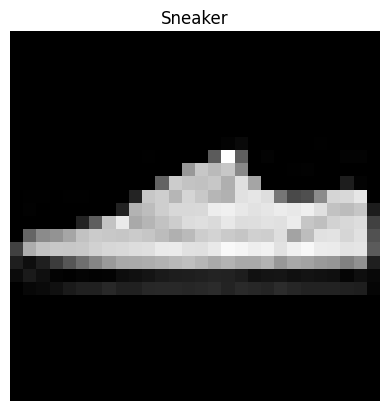

In [11]:
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis("Off");
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

In [12]:
flatten_model = nn.Flatten()

x = train_features_batch[0]

print(f"Shape before flattening: {x.shape}")
print(f"Shape after flattening: {flatten_model(x).shape}")
print(f"Dim after flattening: {flatten_model(x).dim()}")
#flatten_model(x)

Shape before flattening: torch.Size([1, 28, 28])
Shape after flattening: torch.Size([1, 784])
Dim after flattening: 2


In [13]:
from torch import nn

class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()

    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=output_shape)
    )

  def forward(self, x: torch.Tensor):
    return self.layer_stack(x)

In [14]:
int(class_names.__len__())

10

In [15]:
model_1 = FashionMNISTModelV1(input_shape=784, hidden_units=10, output_shape=int(class_names.__len__()))
model_1.to("cpu")

FashionMNISTModelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [16]:
dummy_x = torch.randn((1, 28, 28))
dummy_x.shape

torch.Size([1, 28, 28])

In [17]:
model_1(dummy_x)

tensor([[-0.3547,  0.9163,  0.4637, -0.0154, -0.2025, -0.3041,  0.7347,  0.1754,
         -0.3721, -0.0304]], grad_fn=<AddmmBackward0>)

In [18]:
model_1(dummy_x).squeeze().__len__()

10

In [19]:
model_1.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0296, -0.0084,  0.0328,  ...,  0.0093,  0.0135, -0.0188],
                      [-0.0354,  0.0187,  0.0085,  ..., -0.0001,  0.0115, -0.0008],
                      [ 0.0017,  0.0045,  0.0133,  ..., -0.0188,  0.0059,  0.0100],
                      ...,
                      [ 0.0273, -0.0344,  0.0127,  ...,  0.0283, -0.0011, -0.0230],
                      [ 0.0257,  0.0291,  0.0243,  ..., -0.0087,  0.0001,  0.0176],
                      [-0.0147,  0.0053, -0.0194,  ..., -0.0221,  0.0205, -0.0093]])),
             ('layer_stack.1.bias',
              tensor([ 0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,  0.0018,
                       0.0163,  0.0069])),
             ('layer_stack.2.weight',
              tensor([[-0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,  0.2019,
                        0.2847, -0.1495],
                      [ 0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.3130, -0.

In [20]:
model_1.state_dict()["layer_stack.1.weight"].squeeze()[0].__len__()

784

In [21]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [22]:
from helper_functions import accuracy_fn

In [23]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(), lr = 0.01)

In [24]:
next(model_1.parameters()).squeeze().shape

torch.Size([10, 784])

In [25]:
from timeit import default_timer as timer

def print_train_time(start: float, end:float, device: torch.device = None):
  total_time = end-start
  print(f"Train tim on: {device} took {total_time:.3f} seconds")
  return total_time

In [26]:
start_time = timer()

end_time = timer()
print_train_time(start_time, end_time, device="cpu")

Train tim on: cpu took 0.000 seconds


5.023500000334025e-05

## optimizer will step per batch
## loss will be calculated per batch

In [27]:
X, y  = next(iter(train_dataloader))
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}, {y}")

Shape of X: torch.Size([32, 1, 28, 28])
Shape of y: torch.Size([32]), tensor([2, 1, 1, 4, 3, 1, 4, 1, 2, 6, 3, 2, 7, 2, 0, 6, 1, 2, 0, 1, 3, 9, 4, 5,
        1, 9, 8, 2, 2, 6, 8, 3])


In [28]:
dummy_x.shape

torch.Size([1, 28, 28])

In [29]:
model_1(dummy_x)

tensor([[-0.3547,  0.9163,  0.4637, -0.0154, -0.2025, -0.3041,  0.7347,  0.1754,
         -0.3721, -0.0304]], grad_fn=<AddmmBackward0>)

In [30]:
y = torch.tensor([1])
print(f"{model_1(dummy_x)}, {y}")
loss_fn(model_1(dummy_x), y)

tensor([[-0.3547,  0.9163,  0.4637, -0.0154, -0.2025, -0.3041,  0.7347,  0.1754,
         -0.3721, -0.0304]], grad_fn=<AddmmBackward0>), tensor([1])


tensor(1.5906, grad_fn=<NllLossBackward0>)

In [31]:
from tqdm.auto import tqdm

torch.manual_seed(42)
train_time_start_on_cpu = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}")

  train_loss = 0

  for batch, (X, y) in enumerate(train_dataloader):
    model_1.train()
    y_pred = model_1(X)
    loss = loss_fn(y_pred, y)
    train_loss += loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  if batch % 400 == 0:
    print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

  train_loss = train_loss / len(train_dataloader)
  print(f"Train loss: {train_loss}")

  test_loss, test_acc = 0, 0

  model_1.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      test_pred = model_1(X_test)
      test_loss += loss_fn(test_pred, y_test)
      test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

  test_loss = test_loss / len(test_dataloader)
  test_acc = test_acc / len(test_dataloader)

  print(f"Test loss: {test_loss} | Test accuracy: {test_acc}")

train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu, end=train_time_end_on_cpu, device=str(next(model_1.parameters()).device))


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
Train loss: 0.5669194459915161
Test loss: 0.5064043998718262 | Test accuracy: 82.1785143769968
Epoch: 1
Train loss: 0.5030063390731812
Test loss: 0.4955451190471649 | Test accuracy: 82.90734824281151
Epoch: 2
Train loss: 0.4815042316913605
Test loss: 0.5599979758262634 | Test accuracy: 80.86062300319489
Train tim on: cpu took 50.976 seconds


In [32]:
X, y = next(iter(test_dataloader))
X, y.__len__()

(tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           ...,
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],
 
 
         [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           ...,
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],
 
 
         [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000

In [33]:
def eval_model(model: torch.nn.Module, data_loader: torch.utils.data.DataLoader, loss_fn: torch.nn.Module, accuracy_fn):
  """Return dictionary containing the results of model predicting on data_loader"""
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      X, y = X.to(device), y.to(device)
      y_pred = model(X)
      loss = loss + loss_fn(y_pred, y)
      acc = acc + accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
  loss = loss / len(data_loader)
  acc = acc / len(data_loader)

  return {"model_name": model.__class__.__name__,
          "model_loss": loss.item(),
          "model_acc": acc}

In [36]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [37]:
eval_model(model_1, test_dataloader, loss_fn, accuracy_fn)

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.5599979758262634,
 'model_acc': 80.86062300319489}

In [38]:
model_1.__class__.__name__

'FashionMNISTModelV1'

In [39]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [40]:
class FashionMNISTModelV2(nn.Module):

  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()

    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_shape),
        nn.ReLU()
    )

  def forward(self, x: torch.Tensor):
    return self.layer_stack(x)

In [41]:
model_2 = FashionMNISTModelV2(input_shape=784, hidden_units=10, output_shape=10)
model_2.to(device)

FashionMNISTModelV2(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

In [42]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_2.parameters(), lr=0.01)

In [43]:
loss_fn, optimizer

(CrossEntropyLoss(),
 Adam (
 Parameter Group 0
     amsgrad: False
     betas: (0.9, 0.999)
     capturable: False
     differentiable: False
     eps: 1e-08
     foreach: None
     fused: None
     lr: 0.01
     maximize: False
     weight_decay: 0
 ))

In [44]:
from tqdm.auto import tqdm

torch.manual_seed(42)
train_time_start_on_cpu = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}")

  train_loss = 0

  for batch, (X, y) in enumerate(train_dataloader):
    X, y = X.to(device), y.to(device)
    model_2.train()
    y_pred = model_2(X)
    loss = loss_fn(y_pred, y)
    train_loss += loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  if batch % 400 == 0:
    print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

  train_loss = train_loss / len(train_dataloader)
  print(f"Train loss: {train_loss}")

  test_loss, test_acc = 0, 0

  model_2.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      X_test, y_test = X_test.to(device), y_test.to(device)
      test_pred = model_2(X_test)
      test_loss += loss_fn(test_pred, y_test)
      test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

  test_loss = test_loss / len(test_dataloader)
  test_acc = test_acc / len(test_dataloader)

  print(f"Test loss: {test_loss} | Test accuracy: {test_acc}")

train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu, end=train_time_end_on_cpu, device=str(next(model_2.parameters()).device))


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
Train loss: 0.6239147782325745
Test loss: 0.49087876081466675 | Test accuracy: 82.5179712460064
Epoch: 1
Train loss: 0.4712882339954376
Test loss: 0.46531423926353455 | Test accuracy: 83.59624600638978
Epoch: 2
Train loss: 0.45652449131011963
Test loss: 0.5045384168624878 | Test accuracy: 82.5479233226837
Train tim on: cpu took 36.132 seconds


In [45]:
eval_model(model_2, test_dataloader, loss_fn, accuracy_fn)

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.5045384168624878,
 'model_acc': 82.5479233226837}

In [46]:
74.52076677316293 == eval_model(model_2, test_dataloader, loss_fn, accuracy_fn)["model_acc"]

False

In [47]:
def train_func(model: torch.nn.Module,
               epochs: int,
               train_dataloader: torch.utils.data.DataLoader,
               test_dataloader: torch.utils.data.DataLoader,
               device: torch.device):
  model.to(device)

  for epoch in range(epochs):
    print(f"Epoch: {epoch}")

    train_loss = 0

    for batch, (X, y) in enumerate(train_dataloader):
      model.train()

      X, y = X.to(device), y.to(device)

      y_pred = model(X)
      loss = loss_fn(y_pred, y)
      train_loss += loss
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

    train_loss = train_loss / len(train_dataloader)
    print(f"Train loss: {train_loss}")



In [48]:
train_func(model_2, 3, train_dataloader, test_dataloader, device)

Epoch: 0
Train loss: 0.44291579723358154
Epoch: 1
Train loss: 0.4353570342063904
Epoch: 2
Train loss: 0.4280308783054352


In [49]:
def test_func(model: torch.nn.Module,
              train_dataloader: torch.utils.data.DataLoader,
              test_dataloader: torch.utils.data.DataLoader,
              device: torch.device,
              accuracy_fn ):


    test_loss, test_acc = 0, 0

    model.eval()
    with torch.inference_mode():
      for X_test, y_test in test_dataloader:
        X_test, y_test = X_test.to(device), y_test.to(device)
        test_pred = model(X_test)
        test_loss += loss_fn(test_pred, y_test)
        test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

    test_loss = test_loss / len(test_dataloader)
    test_acc = test_acc / len(test_dataloader)

    print(f"Test loss: {test_loss} | Test accuracy: {test_acc}")

In [50]:
test_func(model_2, train_dataloader, test_dataloader, device, accuracy_fn)

Test loss: 0.48410990834236145 | Test accuracy: 83.65615015974441


In [51]:
eval_model(model_2, test_dataloader, loss_fn, accuracy_fn)

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.48410990834236145,
 'model_acc': 83.65615015974441}

# Creating CCN Model - Juhu!

In [52]:
class FashionMNISTModelV3(nn.Module):

  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()

    self.conv1_block = nn.Sequential(
        nn.Conv2d(in_channels=input_shape, out_channels=hidden_units, kernel_size=(3,3), stride=1, padding=1), # shape 28*28
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=(3,3), stride=1, padding=1), # 26*26
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=(2,2)) # 12 * 12
    )

    self.conv2_block = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=(3,3), stride=1, padding=1), # 11*11
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=(3,3), stride=1, padding=1), # 9 * 9
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=(2,2)) # 4 * 4
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7, out_features=output_shape)
    )

  def forward(self, x: torch.Tensor):
    x = self.conv1_block(x)
    x = self.conv2_block(x)
    x = self.classifier(x)
    return x

In [53]:
torch.tensor([49]).to(device).item()

49

In [54]:
model_3 = FashionMNISTModelV3(input_shape=1, hidden_units=10, output_shape=10)
model_3

FashionMNISTModelV3(
  (conv1_block): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (conv2_block): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [55]:
torch.manual_seed(42)

images = torch.rand(size=(32, 1, 28, 28))
test_image = images[0]
print(test_image.shape)


torch.Size([1, 28, 28])


In [56]:
conv_layer = nn.Conv2d(in_channels=1, out_channels=10, kernel_size=(3,3), stride=1, padding=10)
conv_layer

Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(10, 10))

In [57]:
conv_layer(test_image).shape

torch.Size([10, 46, 46])

In [58]:
conv_output = conv_layer(test_image)
conv_output

tensor([[[ 0.0069,  0.0069,  0.0069,  ...,  0.0069,  0.0069,  0.0069],
         [ 0.0069,  0.0069,  0.0069,  ...,  0.0069,  0.0069,  0.0069],
         [ 0.0069,  0.0069,  0.0069,  ...,  0.0069,  0.0069,  0.0069],
         ...,
         [ 0.0069,  0.0069,  0.0069,  ...,  0.0069,  0.0069,  0.0069],
         [ 0.0069,  0.0069,  0.0069,  ...,  0.0069,  0.0069,  0.0069],
         [ 0.0069,  0.0069,  0.0069,  ...,  0.0069,  0.0069,  0.0069]],

        [[ 0.2165,  0.2165,  0.2165,  ...,  0.2165,  0.2165,  0.2165],
         [ 0.2165,  0.2165,  0.2165,  ...,  0.2165,  0.2165,  0.2165],
         [ 0.2165,  0.2165,  0.2165,  ...,  0.2165,  0.2165,  0.2165],
         ...,
         [ 0.2165,  0.2165,  0.2165,  ...,  0.2165,  0.2165,  0.2165],
         [ 0.2165,  0.2165,  0.2165,  ...,  0.2165,  0.2165,  0.2165],
         [ 0.2165,  0.2165,  0.2165,  ...,  0.2165,  0.2165,  0.2165]],

        [[ 0.1037,  0.1037,  0.1037,  ...,  0.1037,  0.1037,  0.1037],
         [ 0.1037,  0.1037,  0.1037,  ...,  0

In [59]:
image.shape

torch.Size([1, 28, 28])

In [60]:
image.unsqueeze(dim=1).shape

torch.Size([1, 1, 28, 28])

In [61]:
pooling_layer = nn.MaxPool2d(kernel_size=(2))
pooling_layer

MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)

In [62]:
pooling_layer(image).shape

torch.Size([1, 14, 14])

In [63]:
t = torch.randn([1,3,3])

In [64]:
t.shape

torch.Size([1, 3, 3])

In [65]:
t.dim()

3

In [66]:
t

tensor([[[-0.0548,  1.0495, -1.0868],
         [ 1.8633,  0.4007, -0.1691],
         [ 1.2881,  0.5638,  0.8724]]])

In [67]:
pooling_layer(t)

tensor([[[1.8633]]])

In [68]:
t.max()

tensor(1.8633)

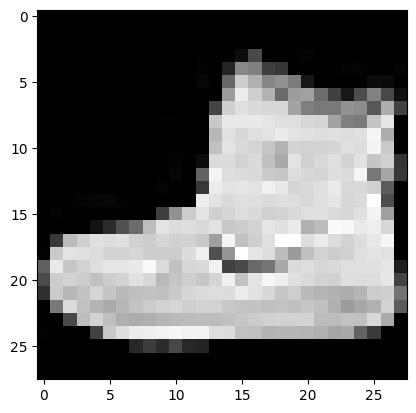

In [69]:
plt.imshow(image.squeeze(), cmap="grey")

In [70]:
device

'cpu'

In [71]:
model_3.to(device)

FashionMNISTModelV3(
  (conv1_block): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (conv2_block): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [72]:
image = image.to(device)
image.device

device(type='cpu')

In [73]:
model_3.to(device)
model_3(image.unsqueeze(dim=0))

tensor([[ 0.0349,  0.0063,  0.0010,  0.0213,  0.0270,  0.0168, -0.0069, -0.0109,
         -0.0496, -0.0228]], grad_fn=<AddmmBackward0>)

In [74]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_3.parameters(), lr=0.01)

# Testing and Training the CNN Model

In [75]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

train_time_start_on_cpu = timer()

for epoch in tqdm(range(3)):
  print(f"Epoch: {epoch}")
  train_func(model_3, 1, train_dataloader, test_dataloader, device)
  test_func(model_3, train_dataloader, test_dataloader, device, accuracy_fn)

train_time_end_on_cpu = timer()

print(f"Total train time: {print_train_time(start=train_time_start_on_cpu, end=train_time_end_on_cpu, device=str(next(model_3.parameters()).device))}")

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
Epoch: 0
Train loss: 0.4869827330112457
Test loss: 0.40959620475769043 | Test accuracy: 85.15375399361022
Epoch: 1
Epoch: 0
Train loss: 0.37640488147735596
Test loss: 0.3693099915981293 | Test accuracy: 86.28194888178913
Epoch: 2
Epoch: 0
Train loss: 0.3577998876571655
Test loss: 0.3985831141471863 | Test accuracy: 85.43330670926518
Train tim on: cpu took 161.964 seconds
Total train time: 161.964008621


In [76]:
eval_model(model_3, test_dataloader, loss_fn, accuracy_fn)

{'model_name': 'FashionMNISTModelV3',
 'model_loss': 0.3985831141471863,
 'model_acc': 85.43330670926518}

In [77]:
import pandas as pd

In [78]:
results = pd.DataFrame([eval_model(model_3, test_dataloader, loss_fn, accuracy_fn), eval_model(model_2, test_dataloader, loss_fn, accuracy_fn)])
results

,model_name,model_loss,model_acc
0,FashionMNISTModelV3,0.398583,85.433307
1,FashionMNISTModelV2,0.484110,83.656150


<Axes: xlabel='model_name'>

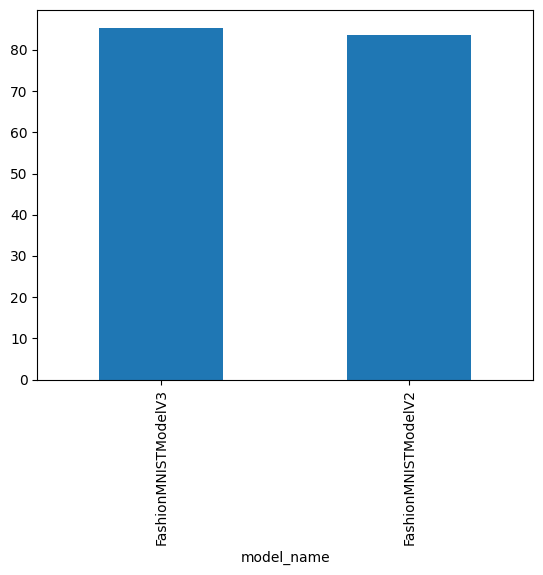

In [81]:
results.set_index("model_name")["model_acc"].plot(kind="bar")

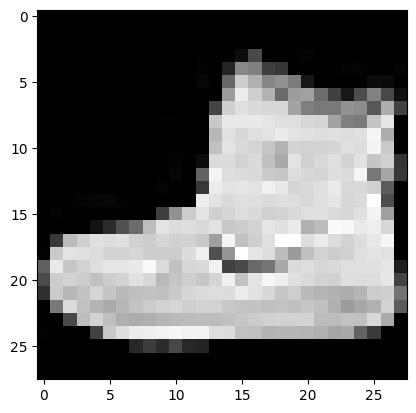

In [86]:
plt.imshow(image.squeeze(), cmap="grey")

In [87]:
model_3

FashionMNISTModelV3(
  (conv1_block): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (conv2_block): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [89]:
image.unsqueeze(dim=0).shape

torch.Size([1, 1, 28, 28])

In [97]:
class_names[torch.argmax(model_3(image.unsqueeze(dim=0)))]

'Ankle boot'

In [94]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [110]:
def make_predictions(model: torch.nn.Module, data: list, device: torch.device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      sample = sample.to(device)
      pred_logit = model(sample)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)
      pred_probs.append(pred_prob.cpu())


  return torch.stack(pred_probs)



In [111]:
list(test_dataloader)[0][1].__len__()

32

In [112]:
import random
random.seed(42)
test_samples = []
test_lables = []
for sample, label in random.sample(list(test_dataloader), k=10):
  test_samples.append(sample)
  test_lables.append(label)

In [141]:
torch.argmax(torch.softmax((make_predictions(model_3, test_samples, device))[0], dim=1), dim=1)

tensor([5, 7, 3, 7, 5, 5, 3, 0, 7, 3, 3, 2, 6, 2, 9, 9, 6, 3, 6, 8, 3, 8, 6, 4,
        4, 1, 8, 2, 6, 5, 0, 2])

In [142]:
test_lables[0]

tensor([5, 5, 3, 7, 5, 5, 4, 0, 7, 3, 3, 2, 0, 2, 9, 9, 0, 3, 0, 8, 3, 8, 8, 4,
        4, 1, 8, 2, 3, 5, 0, 4])

In [144]:
result_bool = torch.eq(test_lables[0], torch.argmax(torch.softmax((make_predictions(model_3, test_samples, device))[0], dim=1), dim=1))

In [148]:
result_count = torch.sum(result_bool == True)

In [153]:
f"{(result_count / 32)}%"

'0.75%'

In [159]:
test_samples[0][:10].shape

torch.Size([10, 1, 28, 28])

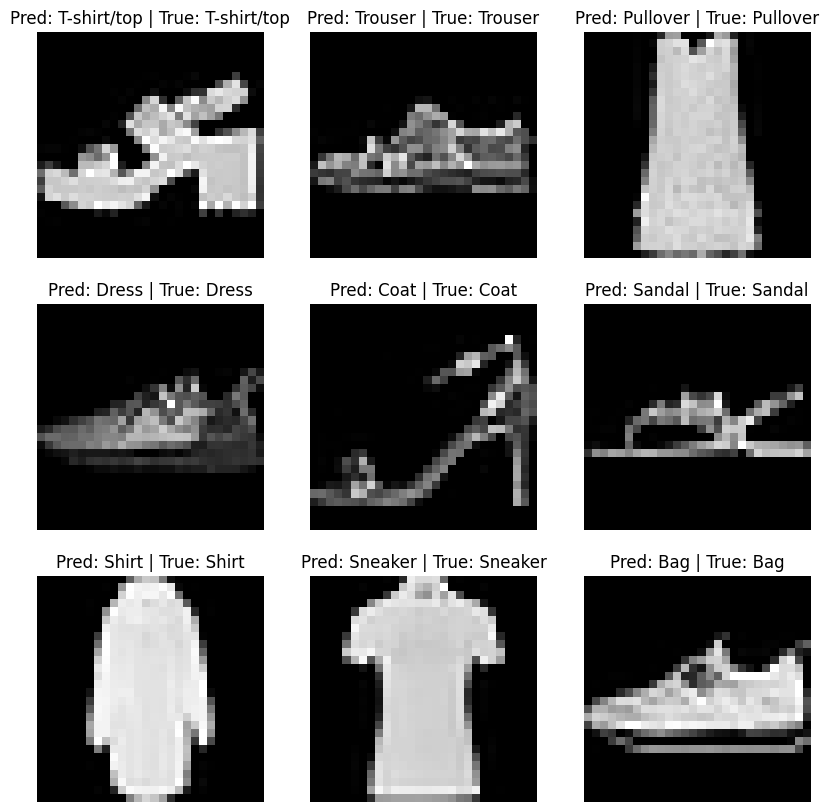

In [162]:
plt.figure(figsize=(10,10))
nrows = 3
ncols = 3

for i, sample in enumerate(test_samples[0][:9]):
  plt.subplot(nrows, ncols, i+1)
  plt.imshow(sample.squeeze(), cmap="grey")
  pred_label = class_names[i]
  true_label = class_names[i]
  plt.title(f"Pred: {pred_label} | True: {true_label}")
  plt.axis(False)


In [164]:
import mlxtend
print(mlxtend.__version__)

0.23.4


## matplot only works on cpu - data to cpu!!

In [166]:
y_preds =[]
model_3.eval()

with torch.inference_mode():
  for x, y in tqdm(test_dataloader, desc="Making predictions..."):
    x, y = x.to(device), y.to(device)

    y_logits = model_3(x)
    y_pred = torch.argmax(torch.softmax(y_logits, dim=1), dim=1)
    y_preds.append(y_pred.cpu())

#print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor.shape

Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

torch.Size([10000])

In [170]:
#!pip install -q torchmetrics

In [175]:
import mlxtend
from mlxtend.plotting import plot_confusion_matrix

In [176]:
confmat = mlxtend.evaluate.confusion_matrix(y_target=test_lables[0], y_predicted=y_pred_tensor)

AttributeError: module 'mlxtend' has no attribute 'evaluate'

In [177]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "03_pytorch_cnn_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_3.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/03_pytorch_cnn_model.pth


In [180]:
torch.manual_seed(42)

loaded_cnn_model = FashionMNISTModelV3(input_shape=1, hidden_units=10, output_shape=10)
loaded_cnn_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
loaded_cnn_model

FashionMNISTModelV3(
  (conv1_block): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (conv2_block): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [183]:
class_names[torch.argmax(loaded_cnn_model(image.unsqueeze(dim=0)))]

'Ankle boot'

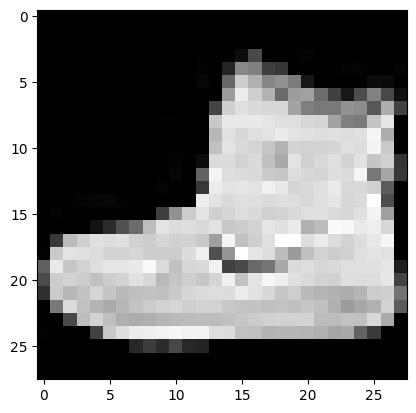

In [184]:
plt.imshow(image.squeeze(), cmap="grey")

In [185]:
loaded_model_results = eval_model(loaded_cnn_model, test_dataloader, loss_fn, accuracy_fn)
loaded_model_results

{'model_name': 'FashionMNISTModelV3',
 'model_loss': 0.3985831141471863,
 'model_acc': 85.43330670926518}

In [187]:
model_results = eval_model(model_3, test_dataloader, loss_fn, accuracy_fn)
model_results

{'model_name': 'FashionMNISTModelV3',
 'model_loss': 0.3985831141471863,
 'model_acc': 85.43330670926518}

In [188]:
torch.isclose(torch.tensor(model_results["model_acc"]), torch.tensor(loaded_model_results["model_acc"]))

tensor(True)